In [171]:
# clear the memory
%reset -f

## Import Modules

In [172]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm   
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report as class_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
plt.style.use('seaborn-dark')
sns.set()

## Inspect the Dataset

In [173]:
# Import train data
df_train = pd.read_csv('Train_v2.csv')
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [174]:
# Number of (rows,columns)
df_train.shape


(23524, 13)

In [175]:
# Check the ratio of male to female responders
df_train.gender_of_respondent.value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [176]:
# Change values in bank_account column to binary
df_train['bank_account'] =df_train['bank_account'].apply(lambda x: 1 if x == 'Yes' else 0)
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [177]:
# Check the ratio of cell phone access
df_train.cellphone_access.value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [178]:
# Check the ratio of people living in Rural & Urban houses
df_train.location_type.value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [276]:
# Import test data
df_test = pd.read_csv("Test_v2.csv")
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [180]:
categorical_data = df_train.select_dtypes(exclude=[np.number])
categorical_data.head()


,country,uniqueid,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,uniqueid_1,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


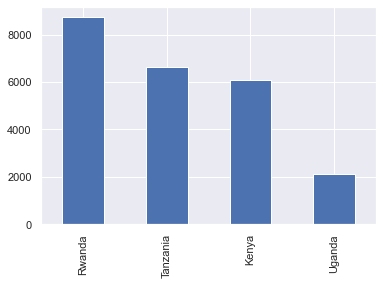

In [181]:
df_train.country.value_counts().plot(kind='bar');

In [182]:
# Check for null values
df_train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

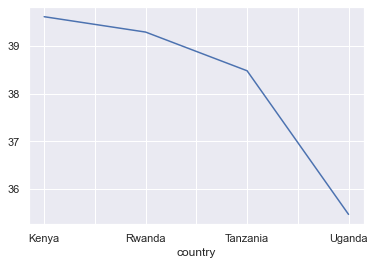

In [183]:
# Graph the age of respondents across the countries
df_train.groupby('country')['age_of_respondent'].mean().plot();

In [184]:
# Inspect the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.3+ MB


In [185]:
# Inspect the numeric values in train data
df_train.describe()

,year,bank_account,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000,23524.000000
mean,2016.975939,0.140792,3.797483,38.805220
std,0.847371,0.347815,2.227613,16.520569
min,2016.000000,0.000000,1.000000,16.000000
25%,2016.000000,0.000000,2.000000,26.000000
50%,2017.000000,0.000000,3.000000,35.000000
75%,2018.000000,0.000000,5.000000,49.000000
max,2018.000000,1.000000,21.000000,100.000000


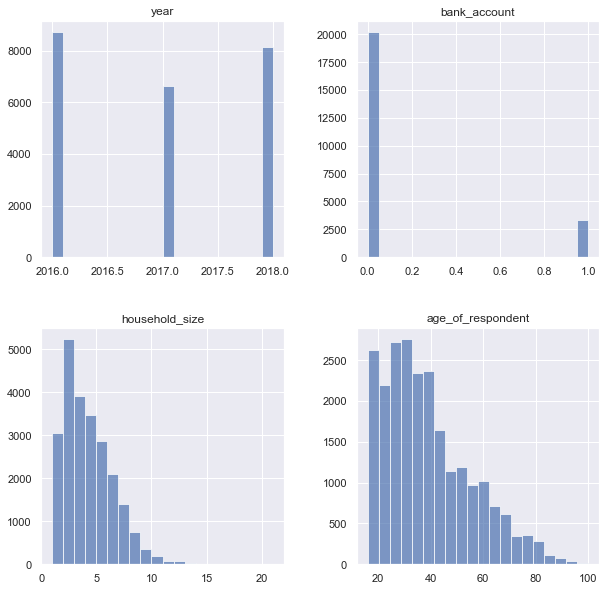

In [186]:
# Graph the numeric values in train data
df_train.hist(bins=20,alpha = 0.7, figsize = (10,10));

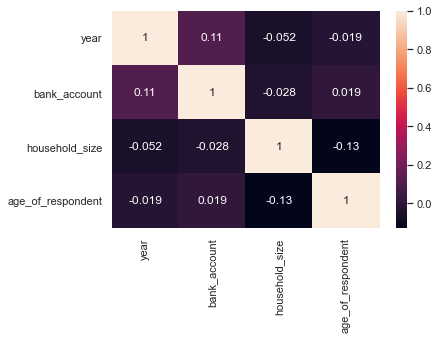

In [187]:
#Check the correlation between the numeric values and the target ("bank_account")
sns.heatmap(data=df_train.corr(),annot=True);

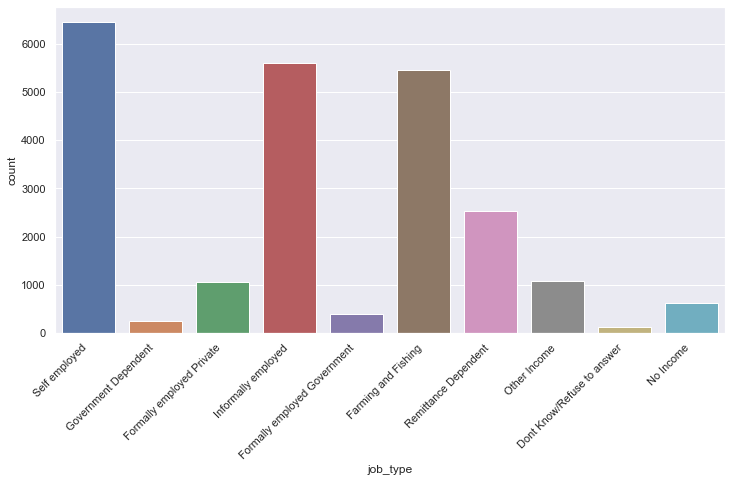

In [188]:
# Graph the employment status
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=categorical_data,x='job_type',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

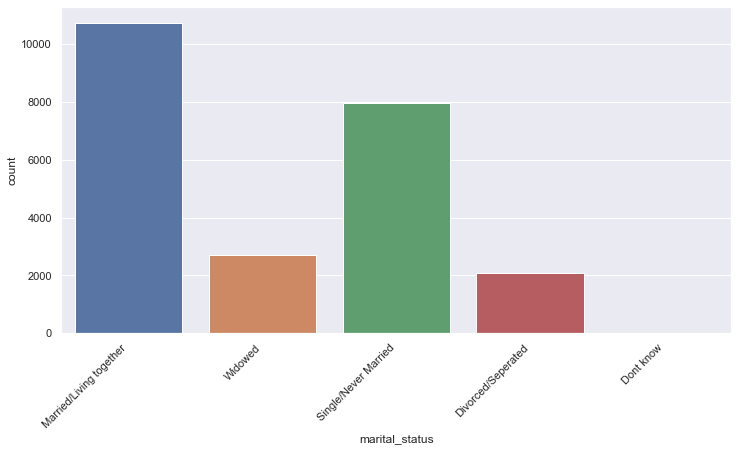

In [189]:
# Graph the marrital status
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=categorical_data,x='marital_status',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

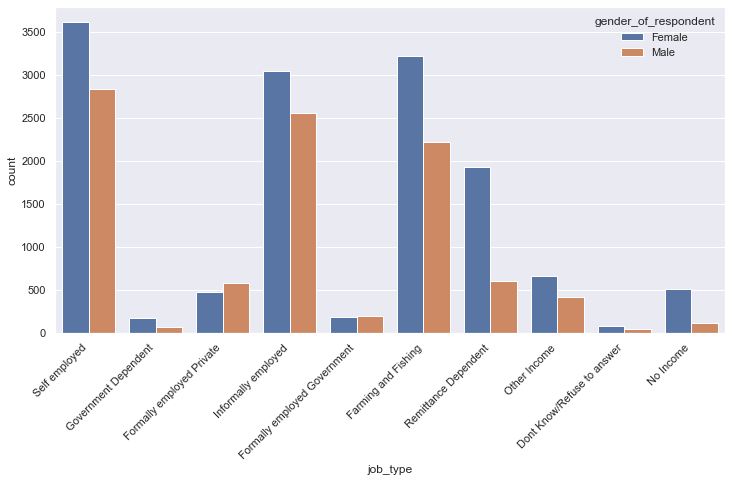

In [190]:
# Graph the Job Type and group it by gender
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='job_type',hue='gender_of_respondent',data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

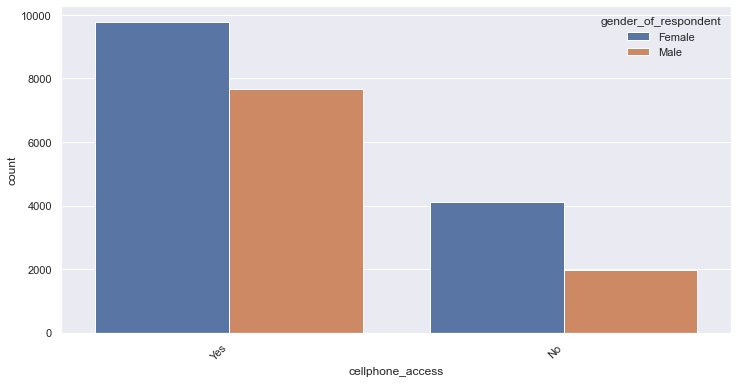

In [192]:
# Graph the cell phone access and group it by gender
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='cellphone_access',hue='gender_of_respondent',data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [193]:
# Check the ratio of respondents by gender
(df_train['gender_of_respondent'].value_counts()/len(df_train.gender_of_respondent) * 100)

Female    58.990818
Male      41.009182
Name: gender_of_respondent, dtype: float64

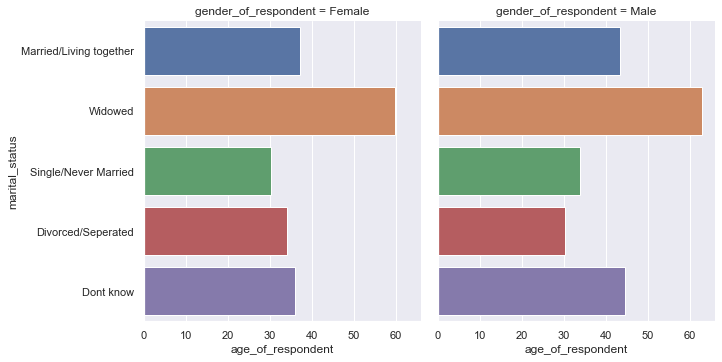

In [194]:
# Graph the count of marrital status by gender
sns.catplot(x="age_of_respondent", y="marital_status",
            col="gender_of_respondent", aspect=1.0,
            kind="bar", data=df_train,ci=None);

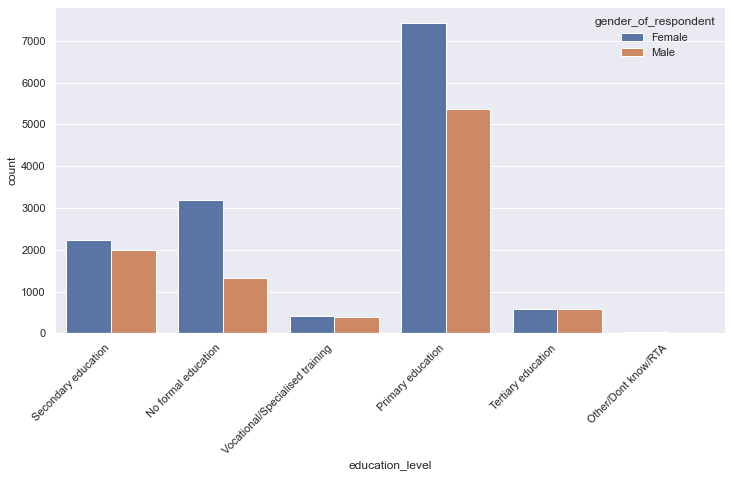

In [195]:
# Grpah the education level by gender
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='education_level',hue='gender_of_respondent',data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

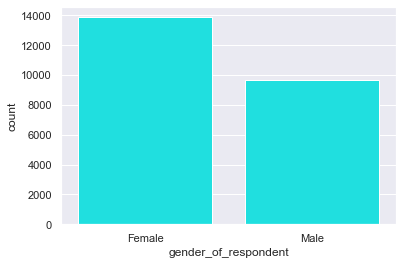

In [197]:
# Graph the gender of respondents
sns.countplot(data=df_train,x='gender_of_respondent',color='cyan');

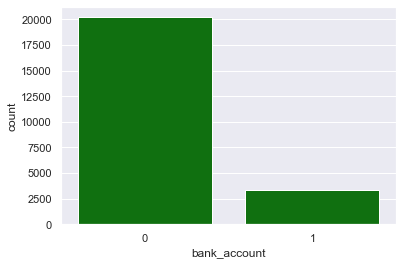

In [198]:
# Graph the proportions of whether a client owns a bank account
sns.countplot(data=df_train,x='bank_account',color='green');

## Prepare the Dataset for ML

In [199]:
# Drop the unique id column
df_train = df_train.drop(columns=['uniqueid'])
df_train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [203]:
# Move the target column ("bank account") to the end of the dataset for easier processing
ba = df_train.bank_account
df_train = df_train.drop('bank_account',1)
df_train['bank_account'] = ba
df_train.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,0
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,0


In [206]:
# Create X and Y train variables
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [208]:
# One hot encoding
x_train = pd.get_dummies(x_train)

## The columns listed below are the columns with p-values lower than 0.05 or 5% that means they are acceptable to use in the ML process. This conclusion is based on the backward elimination method

In [222]:
hold = ['year', 'age_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'location_type_Rural', 'location_type_Urban', 'cellphone_access_No',
       'cellphone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Spouse',
       'marital_status_Married/Living together', 
       'education_level_No formal education',
       'education_level_Primary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private',
       'job_type_Informally employed', 'job_type_No Income',
        'job_type_Remittance Dependent',
       'job_type_Self employed']

In [72]:
#Use backward elimination to select the best columns to use inpredicting. Any column with a P-value
#greater than 0.05 or 5%  is dropped

X_ols = np.append(arr = np.ones((len(x_train),1)).astype(int), values = x_train, axis = 1)
X_opt = x_train[hold]

regressor_ols = sm.OLS(endog = y_train, exog = X_opt ).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bank_account   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     399.9
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        00:19:47   Log-Likelihood:                -4941.4
No. Observations:               23524   AIC:                             9927.
Df Residuals:                   23502   BIC:                         1.010e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
year                                             6.824e-05   5.19e-06     13.141      0.000    5.81e-05    7.84e-05
age_of_respondent                                   0.0013      0.000      8.981      0.000       0.001       0.002
country_Kenya                                       0.0845      0.004     21.149      0.000       0.077       0.092
country_Rwanda                                      0.0383      0.004      9.503      0.000       0.030       0.046
country_Tanzania                                   -0.0453      0.005     -9.823      0.000      -0.054      -0.036
country_Uganda                                     -0.0775      0.006    -12.869      0.000      -0.089      -0.066
location_type_Rural                                -0.0213      0.002     -8.969      0.000      -0.026      -0.017
location_type_Urban                                 0.0213      0.002      8.976      0.000       0.017       0.026
cellphone_access_No                                -0.0366      0.002    -15.088      0.000      -0.041      -0.032
cellphone_access_Yes                                0.0366      0.002     15.096      0.000       0.032       0.041
gender_of_respondent_Female                        -0.0185      0.002     -7.531      0.000      -0.023      -0.014
gender_of_respondent_Male                           0.0185      0.002      7.538      0.000       0.014       0.023
relationship_with_head_Head of Household            0.0746      0.007     11.229      0.000       0.062       0.088
relationship_with_head_Spouse                       0.0597      0.008      7.757      0.000       0.045       0.075
marital_status_Married/Living together              0.0233      0.005      4.458      0.000       0.013       0.034
education_level_No formal education                -0.1633      0.007    -22.417      0.000      -0.178      -0.149
education_level_Primary education                  -0.1159      0.006    -20.339      0.000      -0.127      -0.105
education_level_Tertiary education                  0.2266      0.010     21.886      0.000       0.206       0.247
education_level_Vocational/Specialised training     0.2210      0.012     18.720      0.000       0.198       0.244
job_type_Farming and Fishing                       -0.1090      0.010    -11.092      0.000      -0.128      -0.090
job_type_Formally employed Government               0.2898      0.018     16.103      0.000       0.255       0.325
job_type_Formally employed Private                  0.1876      0.013     14.712      0.000       0.163       0.213
job_type_Informally employed                       -0.1198      0.010    -12.501      0.000      -0.139      -0.101
job_type_No Income                                 -0.0661      0.0

# The ML process

In [211]:
# Importing the dataset into pycaret
from pycaret.classification import *
cl1 = setup(data = df_train,target='bank_account')

,Description,Value
0,session_id,2177
1,Target,bank_account
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(23524, 12)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [219]:
# Use pycaret to check the best 9 models
best9 = compare_models(n_select=9)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8863,0.8635,0.3383,0.7190,0.4596,0.4051,0.4415,1.0970
catboost,CatBoost Classifier,0.8852,0.8621,0.3701,0.6836,0.4797,0.4216,0.4470,11.5030
lightgbm,Light Gradient Boosting Machine,0.8851,0.8589,0.3638,0.6871,0.4751,0.4174,0.4444,0.2700
lr,Logistic Regression,0.8843,0.8482,0.3493,0.6899,0.4634,0.4063,0.4361,4.7320
ada,Ada Boost Classifier,0.8832,0.8497,0.3425,0.6838,0.4561,0.3986,0.4288,0.3750
ridge,Ridge Classifier,0.8831,0.0000,0.3018,0.7185,0.4246,0.3715,0.4152,0.0380
lda,Linear Discriminant Analysis,0.8778,0.8414,0.3985,0.6142,0.4826,0.4169,0.4299,0.1610
knn,K Neighbors Classifier,0.8684,0.7410,0.2742,0.5865,0.3733,0.3105,0.3388,0.4920
rf,Random Forest Classifier,0.8599,0.8102,0.3833,0.5142,0.4390,0.3609,0.3661,1.0650
et,Extra Trees Classifier,0.8502,0.7586,0.3863,0.4717,0.4245,0.3394,0.3417,1.3920


In [220]:
# The best perfoming model
best9[0]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2177, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [260]:
#Generic function for making classification model and accessing performance


def classification_model(model, data, predictors, outcome):
    
    
    X = data[predictors]
    y = data[outcome]
    
    #Perform stratified k-fold cross-validation with 5 folds
    
    skf = StratifiedKFold()

    print(f'\n[number of cross validation splits = {skf.get_n_splits(data)}]\n\n')
    
    accuracy_train_hold = []
    accuracy_test_hold = []
    finder = str(model).find('(')
    col = X.columns.values.reshape(-1,1)
    
    
    for train_index, test_index in skf.split(X, y):
        
        #Filter training data
        train_features = X.iloc[train_index,:]
        
        #Filter the target variables
        train_target = y.iloc[train_index]
         
        #Filter testing data
        test_features = X.iloc[test_index,:]
        
        #Filter the target test variables
        test_target = y.iloc[test_index]
        
        
        #Fit the model
        model.fit(train_features,train_target)
        
        #Make predictions on the training set
        predictions_train = model.predict(train_features)
        
        #Record accuracy rom each cross-validation run of train
        accuracy_train = metrics.accuracy_score(predictions_train, train_target)
        accuracy_train_hold.append(accuracy_train)
        
        #Make predictions on the testing set
        predictions_test = model.predict(test_features)

        #Record accuracy rom each cross-validation run of test
        accuracy_test = metrics.accuracy_score(predictions_test, test_target)
        accuracy_test_hold.append(accuracy_test)
        
 
        
    #Print out train classification report title
    print('      '*4 + '### TRAIN SUMMARY ###\n\n')
    
    #Print out the train classification report
    print('\n','  '*5 \
          + '{} Classification Report \n\n{}'.format(str(model)[0:finder],
                                                     metrics.classification_report(train_target,predictions_train)))
    
    #Print out the train confusion matrix
    
    _confusion_matrix_train = pd.DataFrame(confusion_matrix(train_target,predictions_train),columns = ['true_positive','true_negative'],
             index = ['predicted_positive','predicted_negative'])
    
    print('\n','   '*8+'Confusion Matrix \n\n',_confusion_matrix_train)
    
    
    
    #Print out the train accuracy
    print('\n\nTrain Accuracy List : {} \n'.format(accuracy_train_hold))
    print('Average Train Accuracy is : {}% \n\n'.format(round(100*np.mean(accuracy_train_hold),3)))
    
    #Print out line that divides train classification report summary from test classification report summary
    print('#'*127) 
    
    #Print out test classification report title
    print('\n\n','      '*4 + '### TEST SUMMARY ###\n\n')
    
    #Print out the test classification report
    print('\n\n','  '*5 \
          + '{} Classification Report \n\n{}'.format(str(model)[0:finder],
                                                     metrics.classification_report(test_target,predictions_test)))
    

    #Print out the test confusion matrix
    
    _confusion_matrix_test = pd.DataFrame(confusion_matrix(test_target,predictions_test),columns = ['true_positive','true_negative'],
             index = ['predicted_positive','predicted_negative'])
    
    print('\n','   '*8+'Confusion Matrix\n\n',_confusion_matrix_test)
    
    #Print out the test accuracy
    print('\n\nTest Accuracy List: {}%'.format(accuracy_test_hold))
    print('\nAverage Test Accuracy is : {}%'.format(round(100*np.mean(accuracy_test_hold),3)))
    
   
    
    #Display the feature importance for Logistic Regression
    if str(model)[0:finder] == 'LogisticRegression':
        
        #Collecting the coefficients used to get the feature importance
        coef = np.exp(model.coef_[0]).reshape(-1,1)
        stay1 = []
        
        for num in range(len(coef)):
            stay1.append((coef[num][0],col[num][0]))
        new_stay = sorted(stay1, reverse = True)

        stay3 = []
        for val in new_stay:
            stay3.append([val[1],val[0]])
            
        #Display the feature importance as a dataframe
        return(pd.DataFrame(stay3, columns = ['feature','importance']).head(30))
    
    #Display the feature importance for all other models 

    elif str(model)[0:finder] == 'CatBoostClassifier':

        #A pandas series to store the feature importance
        series = pd.Series(model.get_feature_importance,
                           index = range(len(predictors))).sort_values(ascending = False)
        
        #Display the feature importance as a dataframe
        return(pd.DataFrame(np.column_stack([col,series]), columns = ['feature','importance']).head(30))
    

    else:
        
        #A pandas series to store the feature importance
        series = pd.Series(model.feature_importances_,
                           index = range(len(predictors))).sort_values(ascending = False)
        
        #Display the feature importance as a dataframe
        return(pd.DataFrame(np.column_stack([col,series]), columns = ['feature','importance']).head(30))
    
                            
    
        

In [243]:
# Put back the "bank account" column
x_train['bank_account'] = y_train

## Below is where I used the classification function above to split the train data into train and test, use kfold cross validation, and run it against the best performing ML model 

In [223]:
classification_model(best9[0], x_train, hold, 'bank_account')


[number of cross validation splits = 5]


                        ### TRAIN SUMMARY ###



           GradientBoostingClassifier Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     16170
           1       0.71      0.35      0.47      2650

    accuracy                           0.89     18820
   macro avg       0.81      0.66      0.70     18820
weighted avg       0.87      0.89      0.87     18820


                         Confusion Matrix 

                     true_positive  true_negative
predicted_positive          15802            368
predicted_negative           1733            917


Train Accuracy List : [0.9053616026356343, 0.8906955736224029, 0.8901641957596047, 0.8937244274403529, 0.8883634431455898] 

Average Train Accuracy is : 89.366% 


###############################################################################################################################


                         ### T

,feature,importance
0,year,0.143727
1,age_of_respondent,0.100732
2,country_Kenya,0.0807998
3,country_Rwanda,0.080762
4,country_Tanzania,0.0648858
5,country_Uganda,0.0640605
6,location_type_Rural,0.0638822
7,location_type_Urban,0.0611019
8,cellphone_access_No,0.058181
9,cellphone_access_Yes,0.0548965


## Below I hard coded the best performing model, to compare the accuracy result with that of the Pycaret. I noticed that the accuracies are very similar

In [255]:
GBC = GradientBoostingClassifier(n_estimators = 100)
classification_model(GBC, x_train, hold, 'bank_account')


[number of cross validation splits = 5]


                        ### TRAIN SUMMARY ###



           GradientBoostingClassifier Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     16170
           1       0.71      0.35      0.47      2650

    accuracy                           0.89     18820
   macro avg       0.81      0.66      0.70     18820
weighted avg       0.87      0.89      0.87     18820


                         Confusion Matrix 

                     true_positive  true_negative
predicted_positive          15802            368
predicted_negative           1733            917


Train Accuracy List : [0.9053616026356343, 0.8906955736224029, 0.8901641957596047, 0.8937244274403529, 0.8883634431455898] 

Average Train Accuracy is : 89.366% 


###############################################################################################################################


                         ### T

,feature,importance
0,year,0.143727
1,age_of_respondent,0.104694
2,country_Kenya,0.0807998
3,country_Rwanda,0.080762
4,country_Tanzania,0.0648858
5,country_Uganda,0.0640605
6,location_type_Rural,0.0638822
7,location_type_Urban,0.0611019
8,cellphone_access_No,0.057772
9,cellphone_access_Yes,0.0519373


## Below I used the best perfoming model to predict the values of the df_test file

In [277]:
ID = df_test.uniqueid
df_test = pd.get_dummies(df_test.drop('uniqueid',1))
df_test

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,30,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,7,51,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2018,3,77,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2018,6,39,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2018,3,16,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2018,2,62,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
10082,2018,8,42,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10083,2018,1,39,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10084,2018,6,28,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [278]:
#Save the model predictions to a csv file
submit = best9[0].predict(df_test[hold])
output = pd.DataFrame({'unique_id': ID, 'bank_account': submit})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output.head()

Your submission was successfully saved!


,unique_id,bank_account
0,uniqueid_6056,1
1,uniqueid_6060,1
2,uniqueid_6065,0
3,uniqueid_6072,0
4,uniqueid_6073,0
